# Lab 2

grupo
1. Diego Cordova 20212
2. Paola Contreras 20213
3. Paola de León 20361

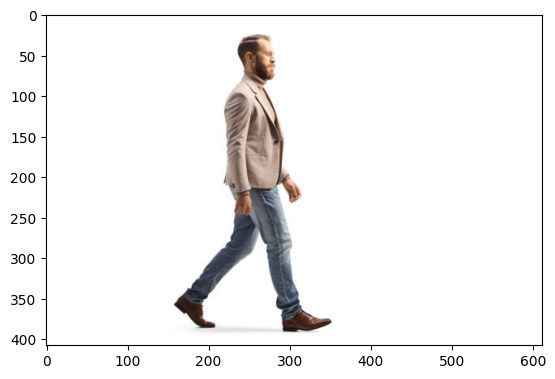

In [1]:
import matplotlib.pyplot as plt
import skimage as ski
import cv2 as cv
import numpy as np

def read_img(filepath):
    data = open(filepath, 'rb')
    img = plt.imread(data)
    return img

img = read_img('./walking.jpg')
plt.imshow(img)

### 1. Implementar una funcion en Python que acepte una imagen a colores, y haga las siguientes transformaciones:
- conversion de RGB a escala de grises
- reescalado (resize) a un tamano (128k, 64k), (ratio 2:1).

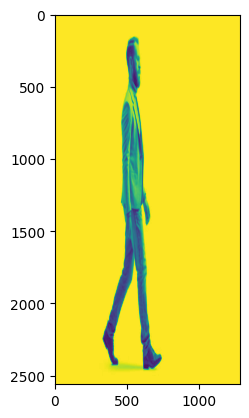

In [2]:
def parte1(img, k):
    if k < 1 or k is None:
        raise Exception('K must be >= 1')

    # grayscale
    gray_img = ski.color.rgb2gray(img)

    # resize
    resized_img = ski.transform.resize(gray_img, (128 * k, 64 * k))
    return resized_img
  
resized = parte1(img, 20)
plt.imshow(resized)

### 2. Implementar una funci´on en Python que calcule la magnitud del y angulo del gradiente de una imagen en escala de grises. 
Internamente su algoritmo debe calcular las correlaciones Gx y Gy de la imagen con los filtros de Prewitt

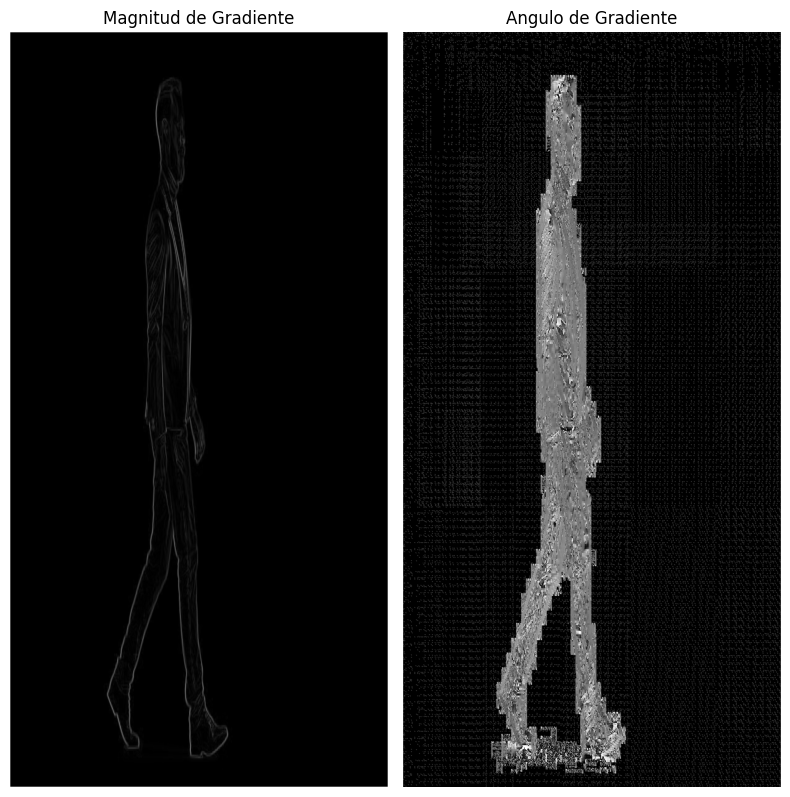

In [7]:
prewittX = np.array([
  [-1, -1, -1 ],
  [ 0,  0,  0 ],
  [ 1,  1,  1 ],
])

prewittY = np.array([
  [-1,  0, 1 ],
  [-1,  0, 1 ],
  [-1,  0, 1 ],
])

def apply_filter(I, filter):
    rows, cols = I.shape
    f_i, f_j = filter.shape

    result = np.zeros_like(I)
    padded_image = np.pad(I, ((1, 1), (1, 1)), mode='constant')

    for i in range(rows):
        for j in range(cols):
            region = padded_image[i:i+f_i, j:j+f_j]
            result[i, j] = np.sum(region * filter)

    return result

def gradient_magnitude_and_angle(image, useNative=False):
    
    Gx = apply_filter(image, prewittX)
    Gy = apply_filter(image, prewittY)

    # Magnitud
    magnitude = np.sqrt(np.square(Gx) + np.square(Gy))

    # Angulo
    angle = np.arctan2(-Gy, Gx) * 180 / np.pi
    angle %= 180 

    return magnitude, angle

magnitude, angle = gradient_magnitude_and_angle(resized, useNative=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(magnitude, cmap='gray')
ax[0].set_title('Magnitud de Gradiente')
ax[0].axis('off')

ax[1].imshow(angle, cmap='gray')
ax[1].set_title('Angulo de Gradiente')
ax[1].axis('off')

fig.tight_layout()
plt.show()